# Seismic Motion

In [1]:
import os
import csv
import math
import numpy as np
import pandas as pd
from scipy import integrate

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from streng.tools.seismic_motion import Record, Spectra

from streng.common.io.output import OutputTable

## Διέγερση

### Φόρτωμα επιταχυνσιογραφήματος

In [2]:
# rec = Record.load_one_column_txt(filename='LEF10301L_ms2.txt', dt=0.01)
rec = Record.load_multi_column_txt(filename='A299_T', dt=0.005, skip_header=2)
rec.calc()

### Γραφήματα διέγερσης vs time

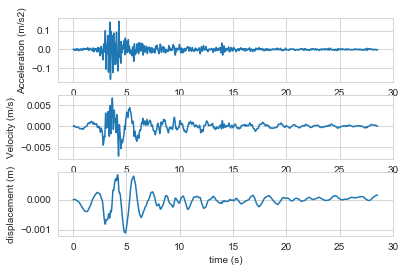

In [3]:
plt.title('Διέγερση')

plt.subplot(3, 1, 1)
plt.plot(rec.time, rec.accel, '-')
plt.ylabel('Acceleration (m/s2)')

plt.subplot(3, 1, 2)
plt.plot(rec.time, rec.velocity, '-')
plt.ylabel('Velocity (m/s)')

plt.subplot(3, 1, 3)
plt.plot(rec.time, rec.displacement, '-')
plt.ylabel('displacement (m)')

plt.xlabel('time (s)')

plt.show()

### Ιδιότητες διέγερσης

In [4]:
rec.props

{'PGA': 0.158568,
 'PGV': 0.0070372525000000005,
 'PGD': 0.0011128142624999995,
 'timePGA': 3.5,
 'timePGV': 4.255,
 'timePGD': 4.89,
 'PGVdivPGA': 0.04438002938802281,
 'aRMS': 0.018296115007151906,
 'vRMS': 0.001095260127434301,
 'dRMS': 0.000245216878063694,
 'Ia': 0.001530561543683963,
 'Ic': 0.01322450437266615,
 'SED': 3.4254427993372033e-05,
 'CAV': 0.238583945,
 'T_Arias5_95': 7.107100421136425}

In [5]:
rec.props['PGA']

0.158568

In [6]:
# rec.output.outputTables['RecordMotionProperties'].to_panda_dataframe
print(rec.output.outputTables['RecordMotionProperties'].to_markdown)

| quantity    |     value |
|:------------|----------:|
| PGA         | 1.586E-01 |
| PGV         | 7.037E-03 |
| PGD         | 1.113E-03 |
| timePGA     | 3.500E+00 |
| timePGV     | 4.255E+00 |
| timePGD     | 4.890E+00 |
| PGVdivPGA   | 4.438E-02 |
| aRMS        | 1.830E-02 |
| vRMS        | 1.095E-03 |
| dRMS        | 2.452E-04 |
| Ia          | 1.531E-03 |
| Ic          | 1.322E-02 |
| SED         | 3.425E-05 |
| CAV         | 2.386E-01 |
| T_Arias5_95 | 7.107E+00 |


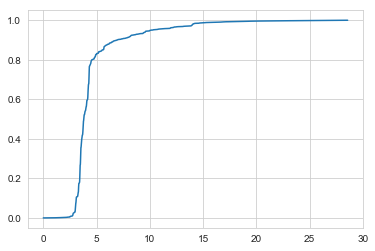

In [7]:
# print(rec.Husid)
# print(rec.Husid_norm)
plt.plot(rec.time, rec.Husid_norm)
plt.show()

In [8]:
print(f'Significant duration between 20% and 80% = {rec.get_significant_duration(0.2, 0.8):.2f}sec')

Significant duration between 20% and 80% = 1.14sec


## Φάσματα

In [9]:
spec = Spectra(accel=rec.accel,
              dt=rec.dt)

In [10]:
spec.get_spectra(0.05)

{'Sa': array([0.158568  , 0.15856914, 0.16109152, 0.16533725, 0.17628474,
        0.23288778, 0.27065375, 0.33599843, 0.39613212, 0.43069411,
        0.51799871, 0.55023189, 0.51544988, 0.48935586, 0.59517231,
        0.54212085, 0.47767697, 0.48424621, 0.51598086, 0.61100123,
        0.6152074 , 0.53800677, 0.60506636, 0.56013589, 0.4723923 ,
        0.39228571, 0.33899649, 0.31293007, 0.27073267, 0.21374742,
        0.1791839 , 0.19131348, 0.18718375, 0.1657421 , 0.1639578 ,
        0.16048069, 0.14903259, 0.14149632, 0.13000465, 0.11699881,
        0.10725041, 0.10318707, 0.10538445, 0.11273131, 0.1218547 ,
        0.12879009, 0.13181015, 0.1300138 , 0.12368605, 0.11336381,
        0.09984149, 0.08891327, 0.08890656, 0.09119748, 0.09215963,
        0.09206837, 0.09119397, 0.08976582, 0.08796115, 0.08592478,
        0.08351124, 0.08080541, 0.07836091, 0.07645634, 0.07388851,
        0.07074927, 0.06714434, 0.06318136, 0.05903948, 0.05477747,
        0.0504517 , 0.05248663, 0.05461471

In [11]:
dt = pd.DataFrame(spec.get_spectra(0.05), columns=['T', 'Sa', 'Sv', 'Sd', 'PSa', 'PSv'])
dt

,T,Sa,Sv,Sd,PSa,PSv
0,0.00,0.158568,0.000000,0.000000e+00,0.158568,0.000000
1,0.01,0.158569,0.000021,4.019071e-07,0.158667,0.000253
2,0.02,0.161092,0.000088,1.634204e-06,0.161289,0.000513
3,0.03,0.165337,0.000214,3.768203e-06,0.165292,0.000789
4,0.04,0.176285,0.000457,7.168283e-06,0.176870,0.001126
5,0.05,0.232888,0.000864,1.465505e-05,0.231423,0.001842
6,0.06,0.270654,0.001505,2.458532e-05,0.269608,0.002575
7,0.07,0.335998,0.002450,4.134890e-05,0.333141,0.003711
8,0.08,0.396132,0.004074,6.389537e-05,0.394139,0.005018
9,0.09,0.430694,0.005030,8.848258e-05,0.431253,0.006177


In [12]:
spectra005 = spec.get_spectra(damping=0.05, 
                 startT=0., 
                 endT=4., 
                 noTs=401)

spectra020 = spec.get_spectra(damping=0.20, 
                 startT=0., 
                 endT=4., 
                 noTs=401)

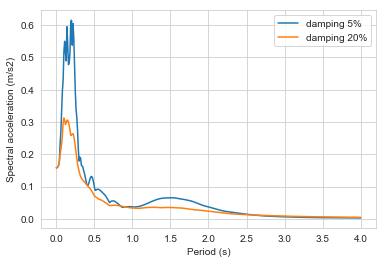

In [13]:
plt.plot(spectra005['T'], spectra005['Sa'], label='damping 5%')
plt.plot(spectra005['T'], spectra020['Sa'], label='damping 20%')
plt.ylabel('Spectral acceleration (m/s2)')
plt.xlabel('Period (s)')
plt.legend()
plt.show()

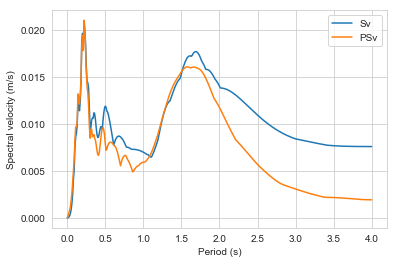

In [14]:
plt.plot(spectra005['T'], spectra005['Sv'], label='Sv')
plt.plot(spectra005['T'], spectra005['PSv'], label='PSv')
plt.ylabel('Spectral velocity (m/s)')
plt.xlabel('Period (s)')
plt.legend()
plt.show()

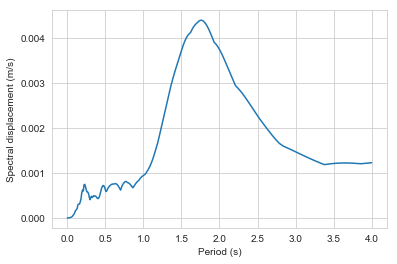

In [15]:
plt.plot(spectra005['T'], spectra005['Sd'])
plt.ylabel('Spectral displacement (m/s)')
plt.xlabel('Period (s)')
plt.show()

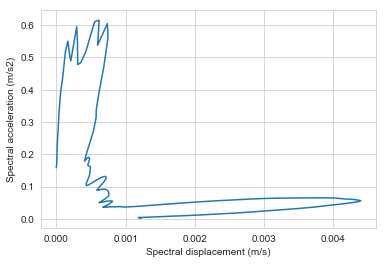

In [16]:
plt.plot(spectra005['Sd'], spectra005['Sa'])
plt.ylabel('Spectral acceleration (m/s2)')
plt.xlabel('Spectral displacement (m/s)')
plt.show()

In [17]:
print(spec.show_spectra_parameters(spectra005))

Acceleration Spectrum Intensity: ASI = 0.1217
Velocity Spectrum Intensity: VSI = 0.0287
Housner Intensity: HI = 0.0246
Predominant Period: Tp = 0.2100


In [18]:
df = pd.DataFrame(data = spectra005, columns=['T', 'Sa', 'Sv', 'Sd', 'PSa', 'PSv'])
df

,T,Sa,Sv,Sd,PSa,PSv
0,0.00,0.158568,0.000000,0.000000e+00,0.158568,0.000000
1,0.01,0.158569,0.000021,4.019071e-07,0.158667,0.000253
2,0.02,0.161092,0.000088,1.634204e-06,0.161289,0.000513
3,0.03,0.165337,0.000214,3.768203e-06,0.165292,0.000789
4,0.04,0.176285,0.000457,7.168283e-06,0.176870,0.001126
5,0.05,0.232888,0.000864,1.465505e-05,0.231423,0.001842
6,0.06,0.270654,0.001505,2.458532e-05,0.269608,0.002575
7,0.07,0.335998,0.002450,4.134890e-05,0.333141,0.003711
8,0.08,0.396132,0.004074,6.389537e-05,0.394139,0.005018
9,0.09,0.430694,0.005030,8.848258e-05,0.431253,0.006177


In [19]:
print(spectra005['ASI'])
print(rec.get_spectra(0.05)['ASI'])

0.12173123166157422
0.12173123166157422


In [20]:
rec.get_spectra(0.05)['Sa']

array([0.158568  , 0.15856914, 0.16109152, 0.16533725, 0.17628474,
       0.23288778, 0.27065375, 0.33599843, 0.39613212, 0.43069411,
       0.51799871, 0.55023189, 0.51544988, 0.48935586, 0.59517231,
       0.54212085, 0.47767697, 0.48424621, 0.51598086, 0.61100123,
       0.6152074 , 0.53800677, 0.60506636, 0.56013589, 0.4723923 ,
       0.39228571, 0.33899649, 0.31293007, 0.27073267, 0.21374742,
       0.1791839 , 0.19131348, 0.18718375, 0.1657421 , 0.1639578 ,
       0.16048069, 0.14903259, 0.14149632, 0.13000465, 0.11699881,
       0.10725041, 0.10318707, 0.10538445, 0.11273131, 0.1218547 ,
       0.12879009, 0.13181015, 0.1300138 , 0.12368605, 0.11336381,
       0.09984149, 0.08891327, 0.08890656, 0.09119748, 0.09215963,
       0.09206837, 0.09119397, 0.08976582, 0.08796115, 0.08592478,
       0.08351124, 0.08080541, 0.07836091, 0.07645634, 0.07388851,
       0.07074927, 0.06714434, 0.06318136, 0.05903948, 0.05477747,
       0.0504517 , 0.05248663, 0.05461471, 0.05556254, 0.05586